In [61]:
pip install mlxtend --upgrade --no-deps

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [63]:
df = pd.read_csv('/content/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [64]:
df = df.iloc[:,2:]

In [65]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [66]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [67]:
x.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [68]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [69]:
from sklearn.preprocessing import StandardScaler

# Assuming you have defined `x` as your input data

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


In [70]:
x_scaled.shape

(400, 2)

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming you have defined and initialized `x` and `y` as your input data and target variable respectively

scaler = StandardScaler()
x_scale = scaler.fit_transform(x)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_scale, y, test_size=0.2, random_state=1)


In [72]:
x_train.shape

(320, 2)

In [73]:
import tensorflow as tf 
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [74]:
model = Sequential()
model.add(Dense(10, activation='relu', input_dim=2))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 10)                30        
                                                                 
 dense_19 (Dense)            (None, 10)                110       
                                                                 
 dense_20 (Dense)            (None, 1)                 11        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


# Batch Gradient Descent (BGD)

In [75]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'])
start = time.time()
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=320)
print(time.time()-start)

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 0.6793 - accuracy: 0.5781 - val_loss: 0.6788 - val_accuracy: 0.6375
Epoch 2/10
1/1 [==============================] - 0s 32ms/step - loss: 0.6698 - accuracy: 0.6219 - val_loss: 0.6727 - val_accuracy: 0.6375
Epoch 3/10
1/1 [==============================] - 0s 33ms/step - loss: 0.6630 - accuracy: 0.6219 - val_loss: 0.6677 - val_accuracy: 0.6625
Epoch 4/10
1/1 [==============================] - 0s 35ms/step - loss: 0.6573 - accuracy: 0.6281 - val_loss: 0.6633 - val_accuracy: 0.6625
Epoch 5/10
1/1 [==============================] - 0s 31ms/step - loss: 0.6523 - accuracy: 0.6313 - val_loss: 0.6592 - val_accuracy: 0.6625
Epoch 6/10
1/1 [==============================] - 0s 44ms/step - loss: 0.6478 - accuracy: 0.6406 - val_loss: 0.6555 - val_accuracy: 0.6625
Epoch 7/10
1/1 [==============================] - 0s 42ms/step - loss: 0.6435 - accuracy: 0.6438 - val_loss: 0.6519 - val_accuracy: 0.6750
Epoch 8/10
1/1 [=============

# stochastic Gradient Descent (SGD)

In [76]:
model1 = Sequential()
model1.add(Dense(10, activation='relu', input_dim=2))
model1.add(Dense(10, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
model1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 10)                30        
                                                                 
 dense_22 (Dense)            (None, 10)                110       
                                                                 
 dense_23 (Dense)            (None, 1)                 11        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [77]:
model1.compile(loss='binary_crossentropy', metrics=['accuracy'])
start = time.time()
history1 = model1.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=1)
print(time.time()-start)

Epoch 1/10
320/320 [==============================] - 2s 4ms/step - loss: 0.5675 - accuracy: 0.6812 - val_loss: 0.5207 - val_accuracy: 0.6875
Epoch 2/10
320/320 [==============================] - 1s 4ms/step - loss: 0.4217 - accuracy: 0.7875 - val_loss: 0.4197 - val_accuracy: 0.7875
Epoch 3/10
320/320 [==============================] - 1s 4ms/step - loss: 0.3532 - accuracy: 0.8125 - val_loss: 0.3734 - val_accuracy: 0.8250
Epoch 4/10
320/320 [==============================] - 1s 3ms/step - loss: 0.3087 - accuracy: 0.8469 - val_loss: 0.3555 - val_accuracy: 0.8375
Epoch 5/10
320/320 [==============================] - 1s 3ms/step - loss: 0.2827 - accuracy: 0.8531 - val_loss: 0.3519 - val_accuracy: 0.8375
Epoch 6/10
320/320 [==============================] - 1s 3ms/step - loss: 0.2671 - accuracy: 0.8625 - val_loss: 0.3625 - val_accuracy: 0.8500
Epoch 7/10
320/320 [==============================] - 1s 3ms/step - loss: 0.2600 - accuracy: 0.8844 - val_loss: 0.3682 - val_accuracy: 0.8625
Epoch 

# Mini - Batch GD

In [78]:
model2 = Sequential()
model2.add(Dense(10, activation='relu', input_dim=2))
model2.add(Dense(10, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 10)                30        
                                                                 
 dense_25 (Dense)            (None, 10)                110       
                                                                 
 dense_26 (Dense)            (None, 1)                 11        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [79]:
model2.compile(loss='binary_crossentropy', metrics=['accuracy'])
start = time.time()
history2 = model2.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=100)
print(time.time()-start)

Epoch 1/10
4/4 [==============================] - 1s 53ms/step - loss: 0.6334 - accuracy: 0.6438 - val_loss: 0.6506 - val_accuracy: 0.6375
Epoch 2/10
4/4 [==============================] - 0s 12ms/step - loss: 0.6195 - accuracy: 0.6687 - val_loss: 0.6418 - val_accuracy: 0.6375
Epoch 3/10
4/4 [==============================] - 0s 14ms/step - loss: 0.6092 - accuracy: 0.6875 - val_loss: 0.6347 - val_accuracy: 0.6500
Epoch 4/10
4/4 [==============================] - 0s 12ms/step - loss: 0.6010 - accuracy: 0.7125 - val_loss: 0.6281 - val_accuracy: 0.6750
Epoch 5/10
4/4 [==============================] - 0s 11ms/step - loss: 0.5932 - accuracy: 0.7344 - val_loss: 0.6219 - val_accuracy: 0.6750
Epoch 6/10
4/4 [==============================] - 0s 12ms/step - loss: 0.5855 - accuracy: 0.7437 - val_loss: 0.6159 - val_accuracy: 0.6875
Epoch 7/10
4/4 [==============================] - 0s 12ms/step - loss: 0.5781 - accuracy: 0.7500 - val_loss: 0.6102 - val_accuracy: 0.6875
Epoch 8/10
4/4 [===========

In [80]:
# BGD
# time = 1.7341418266296387
# accuracy = (training = 0.6625 )

# SGD
# time = 20.942851305007935
# accuracy = (training = 0.8969)

# Mini-Batch
# time = 1.794792652130127
# accuracy = (training = 0.7626 )


# BGD > MBGD > SGD in terms of TIME
# SGD > MBGD > BGD in terms of PERFORMANCE

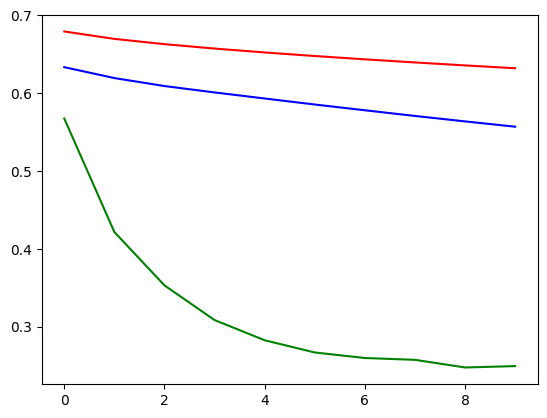

In [81]:
plt.plot(history.history['loss'], color='red')    #BGD
plt.plot(history2.history['loss'], color='blue')   #MBGD
plt.plot(history1.history['loss'], color='green')  #SGD


In [82]:
# Taking epochs = 100 for all the three BGD, SGD and MBGD

In [83]:
#BGD
model.compile(loss='binary_crossentropy', metrics=['accuracy'])
start = time.time()
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=320)
print(time.time()-start)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 0.6286 - accuracy: 0.6656 - val_loss: 0.6341 - val_accuracy: 0.7125
Epoch 2/100
1/1 [==============================] - 0s 33ms/step - loss: 0.6198 - accuracy: 0.6750 - val_loss: 0.6283 - val_accuracy: 0.7250
Epoch 3/100
1/1 [==============================] - 0s 36ms/step - loss: 0.6136 - accuracy: 0.6812 - val_loss: 0.6235 - val_accuracy: 0.7375
Epoch 4/100
1/1 [==============================] - 0s 33ms/step - loss: 0.6083 - accuracy: 0.6969 - val_loss: 0.6193 - val_accuracy: 0.7375
Epoch 5/100
1/1 [==============================] - 0s 34ms/step - loss: 0.6038 - accuracy: 0.7094 - val_loss: 0.6155 - val_accuracy: 0.7375
Epoch 6/100
1/1 [==============================] - 0s 32ms/step - loss: 0.5996 - accuracy: 0.7156 - val_loss: 0.6120 - val_accuracy: 0.7375
Epoch 7/100
1/1 [==============================] - 0s 35ms/step - loss: 0.5958 - accuracy: 0.7156 - val_loss: 0.6087 - val_accuracy: 0.7375
Epoch 8/100
1/1 [=====

In [84]:
#SGD
model1.compile(loss='binary_crossentropy', metrics=['accuracy'])
start = time.time()
history1 = model1.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=1)
print(time.time()-start)

Epoch 1/100
320/320 [==============================] - 2s 4ms/step - loss: 0.2425 - accuracy: 0.9062 - val_loss: 0.3924 - val_accuracy: 0.8750
Epoch 2/100
320/320 [==============================] - 1s 3ms/step - loss: 0.2465 - accuracy: 0.9094 - val_loss: 0.4056 - val_accuracy: 0.8750
Epoch 3/100
320/320 [==============================] - 1s 3ms/step - loss: 0.2426 - accuracy: 0.9062 - val_loss: 0.4274 - val_accuracy: 0.8750
Epoch 4/100
320/320 [==============================] - 1s 3ms/step - loss: 0.2423 - accuracy: 0.9125 - val_loss: 0.4296 - val_accuracy: 0.8750
Epoch 5/100
320/320 [==============================] - 1s 3ms/step - loss: 0.2416 - accuracy: 0.9156 - val_loss: 0.4348 - val_accuracy: 0.8750
Epoch 6/100
320/320 [==============================] - 1s 3ms/step - loss: 0.2397 - accuracy: 0.9187 - val_loss: 0.4393 - val_accuracy: 0.8625
Epoch 7/100
320/320 [==============================] - 1s 3ms/step - loss: 0.2416 - accuracy: 0.9187 - val_loss: 0.4442 - val_accuracy: 0.8625

In [85]:
# MBGD
model2.compile(loss='binary_crossentropy', metrics=['accuracy'])
start = time.time()
history2 = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=320)
print(time.time()-start)

Epoch 1/100
1/1 [==============================] - 0s 66ms/step - loss: 0.3780 - accuracy: 0.9187 - val_loss: 0.4340 - val_accuracy: 0.8750
Epoch 2/100
1/1 [==============================] - 0s 32ms/step - loss: 0.3763 - accuracy: 0.9187 - val_loss: 0.4328 - val_accuracy: 0.8750
Epoch 3/100
1/1 [==============================] - 0s 33ms/step - loss: 0.3747 - accuracy: 0.9187 - val_loss: 0.4317 - val_accuracy: 0.8750
Epoch 4/100
1/1 [==============================] - 0s 31ms/step - loss: 0.3731 - accuracy: 0.9187 - val_loss: 0.4306 - val_accuracy: 0.8750
Epoch 5/100
1/1 [==============================] - 0s 32ms/step - loss: 0.3715 - accuracy: 0.9187 - val_loss: 0.4296 - val_accuracy: 0.8750
Epoch 6/100
1/1 [==============================] - 0s 32ms/step - loss: 0.3699 - accuracy: 0.9187 - val_loss: 0.4285 - val_accuracy: 0.8750
Epoch 7/100
1/1 [==============================] - 0s 32ms/step - loss: 0.3684 - accuracy: 0.9187 - val_loss: 0.4274 - val_accuracy: 0.8750
Epoch 8/100
1/1 [===

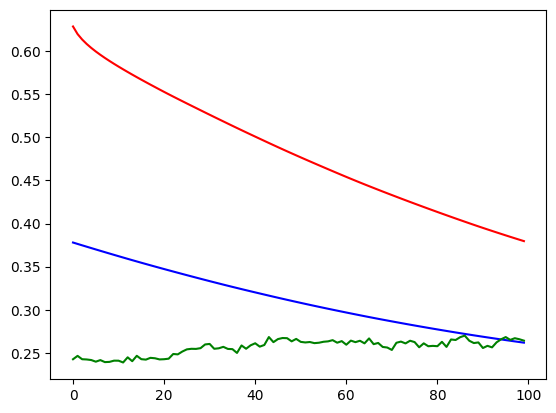

In [86]:
plt.plot(history.history['loss'], color='red')    #BGD
plt.plot(history2.history['loss'], color='blue')   #MBGD
plt.plot(history1.history['loss'], color='green')  #SGD
